<a href="https://colab.research.google.com/github/ChinarVyas/Evaluation-Projects/blob/main/Avocado_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#!pip install pycaret

Avocado Project
Project Description
This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV.
The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados.
Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags.
The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.
Some relevant columns in the dataset:
•	Date - The date of the observation
•	AveragePrice - the average price of a single avocado
•	type - conventional or organic
•	year - the year
•	Region - the city or region of the observation
•	Total Volume - Total number of avocados sold
•	4046 - Total number of avocados with PLU 4046 sold
•	4225 - Total number of avocados with PLU 4225 sold
•	4770 - Total number of avocados with PLU 4770 sold

Inspiration /Label
The dataset can be seen in two angles to find the region and find the average price .
Task: One of Classification and other of Regression
Do both tasks in the same .ipynb file and submit at single file.

Dataset Link-
•	https://github.com/dsrscientist/Data-Science-ML-Capstone-Projects/blob/master/avocado.csv.zip


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import datetime
from time import time
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier,AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import classification_report,accuracy_score,roc_curve,confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [3]:
avocado=pd.read_csv(r'/content/drive/MyDrive/Data Analysis/Data/avocado.csv')

In [4]:
avocado

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,04-02-2018,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,28-01-2018,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,21-01-2018,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,14-01-2018,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [5]:
avocado.rename(columns={'Unnamed: 0': 'week'}, inplace=True)

In [6]:
avocado

,week,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,04-02-2018,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,28-01-2018,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,21-01-2018,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,14-01-2018,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [7]:
avocado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   week          18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


We see around 18249 rows and 14 columns where the data is week/ year /date wise presented . on the st glance we do not see any null values. but will dive deeper to check the whitespaces.


In [8]:
avocado.columns

Index(['week', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

In [9]:
for i in avocado:
  print(avocado[i].value_counts())
  print('/n')

0     432
7     432
1     432
11    432
9     432
8     432
10    432
6     432
5     432
4     432
3     432
2     432
41    324
34    324
35    324
36    324
37    324
38    324
39    324
40    324
47    324
42    324
43    324
44    324
45    324
46    324
32    324
48    324
49    324
50    324
33    324
26    324
31    324
30    324
12    324
13    324
14    324
15    324
16    324
17    324
18    324
19    324
20    324
21    324
22    324
23    324
24    324
25    324
27    324
28    324
29    324
51    322
52    107
Name: week, dtype: int64
/n
27-12-2015    108
24-12-2017    108
10-12-2017    108
03-12-2017    108
26-11-2017    108
             ... 
06-11-2016    108
07-01-2018    108
18-06-2017    107
25-06-2017    107
06-12-2015    107
Name: Date, Length: 169, dtype: int64
/n
1.15    202
1.18    199
1.08    194
1.26    193
1.13    192
       ... 
3.25      1
3.12      1
2.68      1
3.03      1
3.17      1
Name: AveragePrice, Length: 259, dtype: int64
/n
4103.97       2
3529.4



1.   we see multiple instances where only or 2 of PLU's have been sold, hence the other colums shows "0"
2.   removing the whitespaces below

*   We also see there are no null values in the data








In [10]:
avocado.replace(" ","")

,week,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,04-02-2018,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,28-01-2018,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,21-01-2018,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,14-01-2018,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [11]:
avocado.describe()

,week,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


As data is uneven and is in different formats will need to scale the data. hence not drawing any conclusions at this point

In [12]:
avocado.isnull().sum()

week            0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [13]:
avocado.nunique()

week               53
Date              169
AveragePrice      259
Total Volume    18237
4046            17702
4225            18103
4770            12071
Total Bags      18097
Small Bags      17321
Large Bags      15082
XLarge Bags      5588
type                2
year                4
region             54
dtype: int64

In [14]:
avocado['type'].value_counts()

conventional    9126
organic         9123
Name: type, dtype: int64

In [15]:
def datetime_to_int(dt):
    return int(datetime.datetime.strptime(dt, "%d-%m-%Y").strftime("%Y%m%d"))

avocado['Date'] = avocado['Date'].apply(datetime_to_int)

In [16]:
avocado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   week          18249 non-null  int64  
 1   Date          18249 non-null  int64  
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(3), object(2)
memory usage: 1.9+ MB


#We will 1st be working on classification problem, as the data is balanced we do not have to worry about balancing the data.

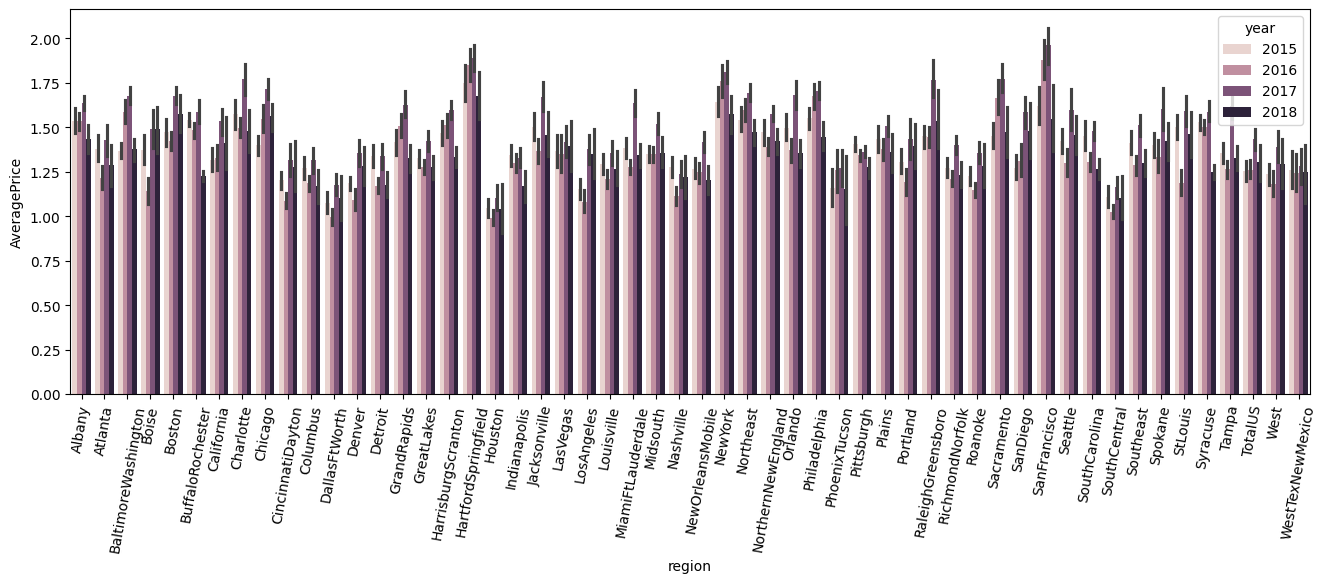

In [17]:
plt.figure(figsize=(16,5))
plt.xticks (rotation=80)
sns.barplot(x="region",y="AveragePrice" ,data= avocado,hue='year')
plt.show()

<AxesSubplot: xlabel='year', ylabel='Total Volume'>

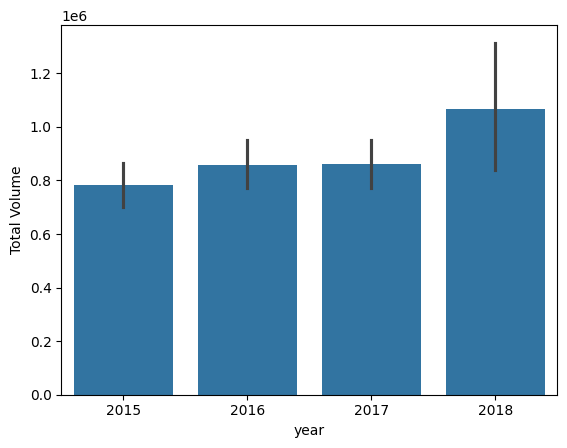

In [18]:
sns.barplot(x="year",y="Total Volume" ,data= avocado)


---

---


#  *   we see maximum sales is being shown in 2018
#  *   we also see that the average price ranges between \$1 to $2 from 2015-2018
#  *   we will also work on skewness and outliers in the data below


---


---





<AxesSubplot: xlabel='AveragePrice', ylabel='Density'>

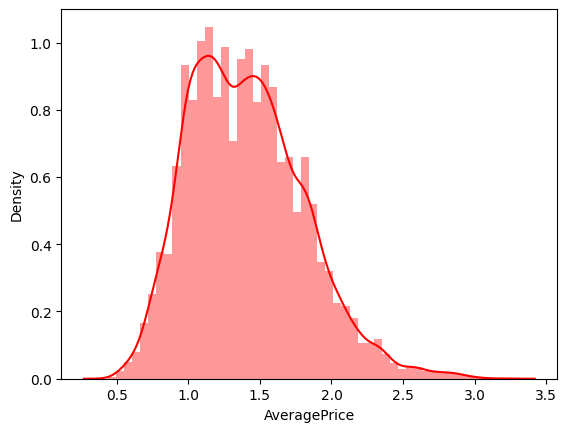

In [19]:
sns.distplot(avocado['AveragePrice'],color='r',hist=True)

array([[<AxesSubplot: title={'center': 'week'}>,
        <AxesSubplot: title={'center': 'Date'}>,
        <AxesSubplot: title={'center': 'AveragePrice'}>,
        <AxesSubplot: title={'center': 'Total Volume'}>],
       [<AxesSubplot: title={'center': '4046'}>,
        <AxesSubplot: title={'center': '4225'}>,
        <AxesSubplot: title={'center': '4770'}>,
        <AxesSubplot: title={'center': 'Total Bags'}>],
       [<AxesSubplot: title={'center': 'Small Bags'}>,
        <AxesSubplot: title={'center': 'Large Bags'}>,
        <AxesSubplot: title={'center': 'XLarge Bags'}>,
        <AxesSubplot: title={'center': 'year'}>],
       [<AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >,
        <AxesSubplot: >]], dtype=object)

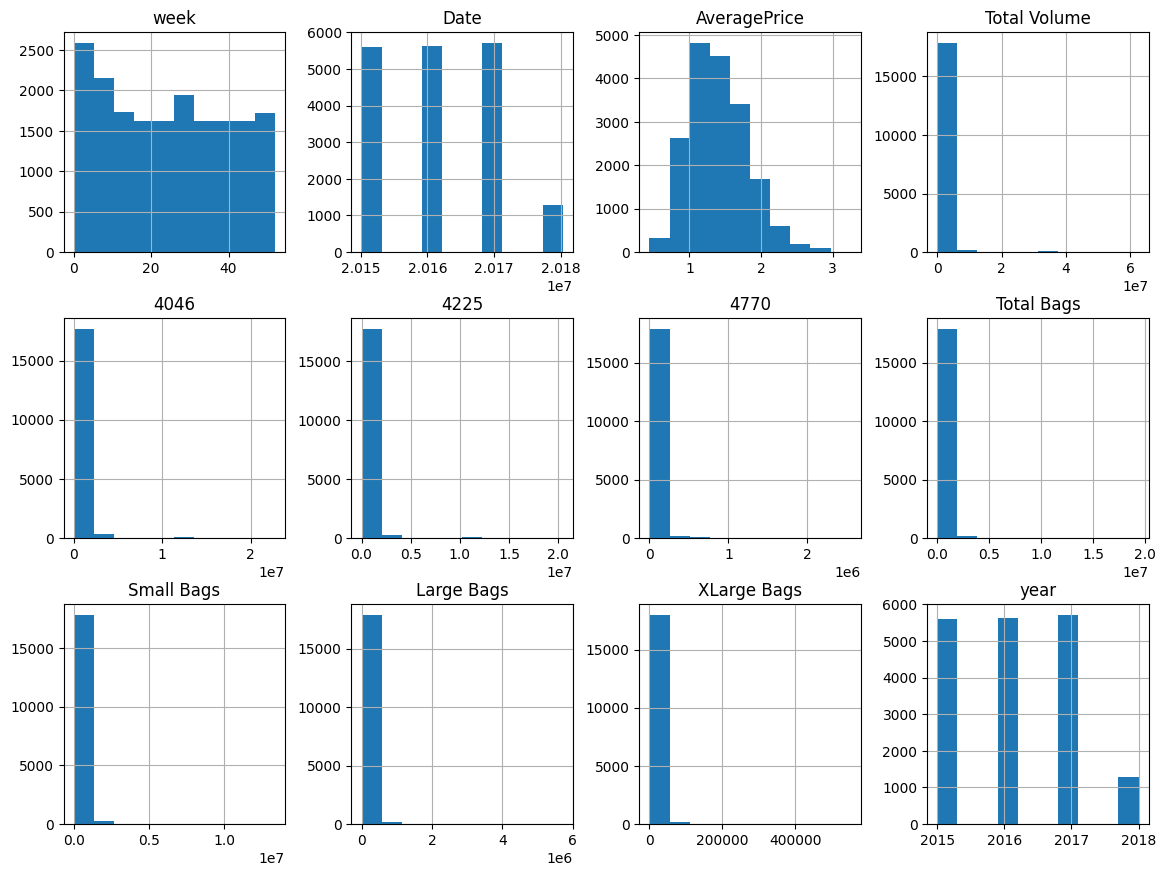

In [20]:
avocado.hist(figsize=(14,14),grid=True,layout=(4,4))

In [21]:
avocado.skew()

week             0.108334
Date             0.190211
AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
year             0.215339
dtype: float64

In [22]:
skew=('Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags')
for col in skew :
    if avocado.skew().loc[col]>0.55:
        avocado[col]=np.log1p(avocado[col])

In [23]:
avocado.skew()

week            0.108334
Date            0.190211
AveragePrice    0.580303
Total Volume    0.088098
4046           -0.328195
4225           -0.486654
4770            0.099986
Total Bags     -0.218874
Small Bags     -0.622148
Large Bags     -0.547765
XLarge Bags     1.176494
year            0.215339
dtype: float64

array([[<AxesSubplot: title={'center': 'week'}>,
        <AxesSubplot: title={'center': 'Date'}>,
        <AxesSubplot: title={'center': 'AveragePrice'}>,
        <AxesSubplot: title={'center': 'Total Volume'}>],
       [<AxesSubplot: title={'center': '4046'}>,
        <AxesSubplot: title={'center': '4225'}>,
        <AxesSubplot: title={'center': '4770'}>,
        <AxesSubplot: title={'center': 'Total Bags'}>],
       [<AxesSubplot: title={'center': 'Small Bags'}>,
        <AxesSubplot: title={'center': 'Large Bags'}>,
        <AxesSubplot: title={'center': 'XLarge Bags'}>,
        <AxesSubplot: title={'center': 'year'}>],
       [<AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >,
        <AxesSubplot: >]], dtype=object)

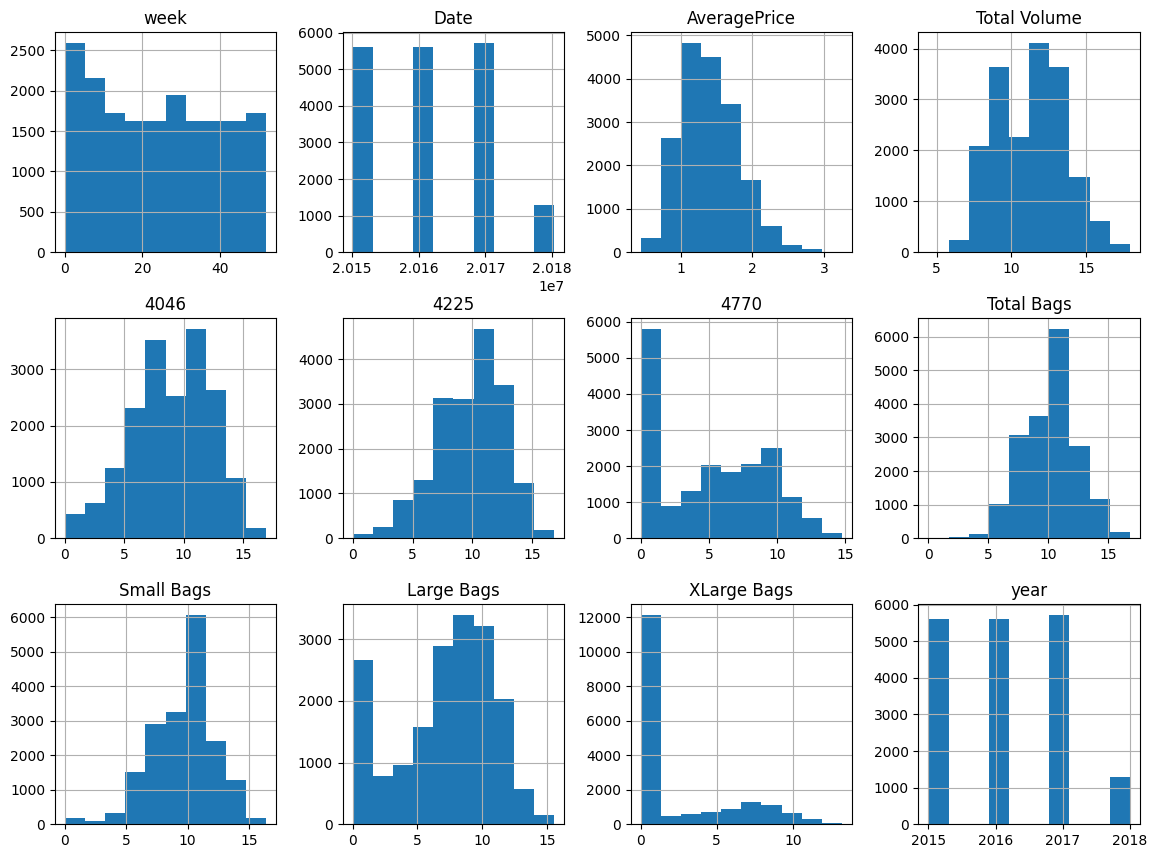

In [24]:
avocado.hist(figsize=(14,14),grid=True,layout=(4,4))

week               AxesSubplot(0.125,0.712609;0.168478x0.167391)
Date            AxesSubplot(0.327174,0.712609;0.168478x0.167391)
AveragePrice    AxesSubplot(0.529348,0.712609;0.168478x0.167391)
Total Volume    AxesSubplot(0.731522,0.712609;0.168478x0.167391)
4046               AxesSubplot(0.125,0.511739;0.168478x0.167391)
4225            AxesSubplot(0.327174,0.511739;0.168478x0.167391)
4770            AxesSubplot(0.529348,0.511739;0.168478x0.167391)
Total Bags      AxesSubplot(0.731522,0.511739;0.168478x0.167391)
Small Bags          AxesSubplot(0.125,0.31087;0.168478x0.167391)
Large Bags       AxesSubplot(0.327174,0.31087;0.168478x0.167391)
XLarge Bags      AxesSubplot(0.529348,0.31087;0.168478x0.167391)
year             AxesSubplot(0.731522,0.31087;0.168478x0.167391)
dtype: object

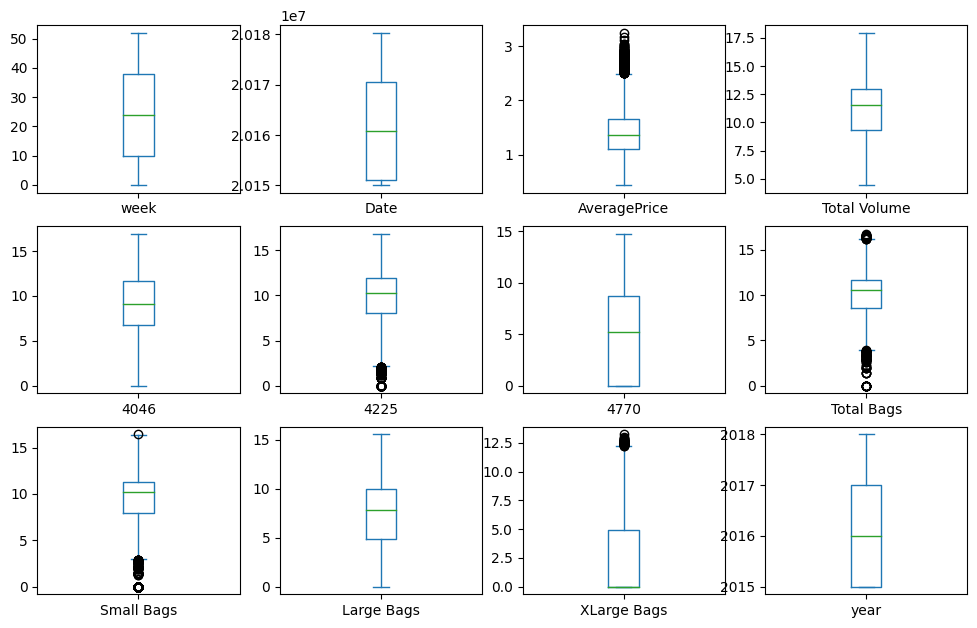

In [25]:
avocado.plot(kind='box',subplots=True,layout=(4,4),figsize=(12,10))

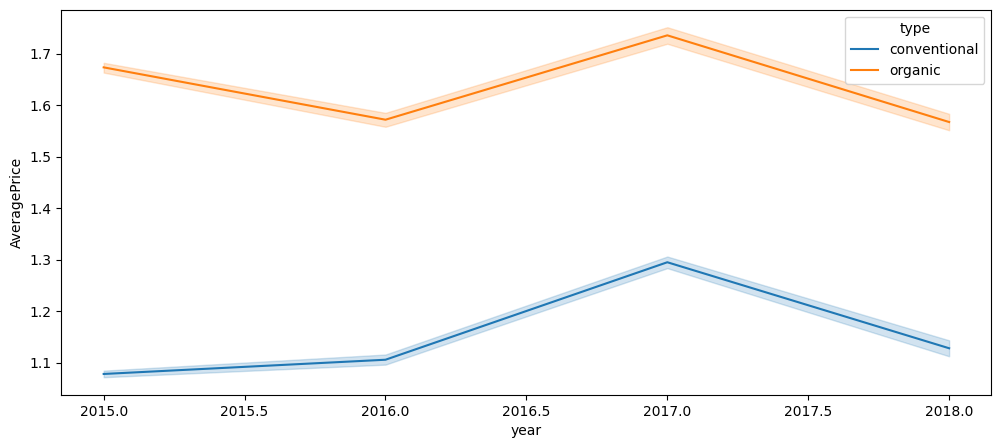

Average Price: type
conventional    1.158040
organic         1.653999
Name: AveragePrice, dtype: float64


In [26]:
plt.figure(figsize=(12,5))
sns.lineplot(x='year',y='AveragePrice',hue='type', data=avocado)
plt.show()
print('Average Price:',avocado.groupby(['type'])['AveragePrice'].mean())

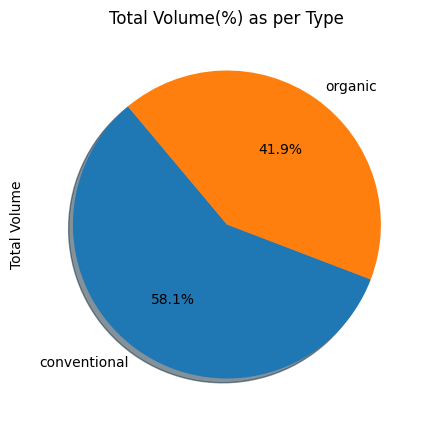

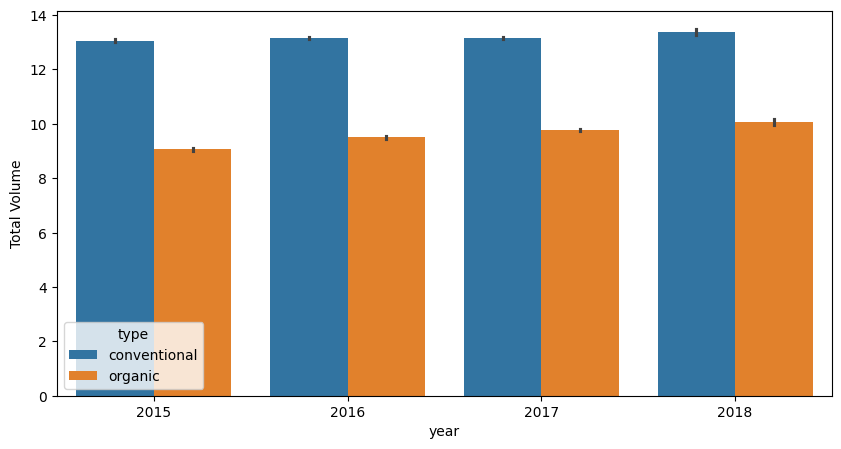

Based on Type:                   week           Date  AveragePrice  Total Volume      4046  \
type                                                                          
conventional  0.221184  183999.440538      0.010568      0.119940  0.104149   
organic       0.221030  183938.948089      0.015089      0.086572  0.059952   

                  4225      4770  Total Bags  Small Bags  Large Bags  \
type                                                                   
conventional  0.108899  0.075737    0.107917    0.105146    0.082445   
organic       0.070607  0.016487    0.078007    0.071837    0.047415   

              XLarge Bags       year  
type                                  
conventional     0.040753  18.399366  
organic          0.000516  18.393317  


In [27]:
avocado.groupby(['type'])['Total Volume'].sum().plot(kind='pie',subplots=True,figsize=(10,5),
autopct='%1.1f%%', shadow=True, startangle=130)
plt.title('Total Volume(%) as per Type')

plt.figure(figsize=(10,5))
sns.barplot(x='year',y='Total Volume',hue='type', data=avocado)
plt.show()


print('=======================================================================')
print('Based on Type:',(avocado.groupby(['type']).sum())/1000000)


we see that the conventional type was sold more each year however the price for organic type was higher than that of conventional type

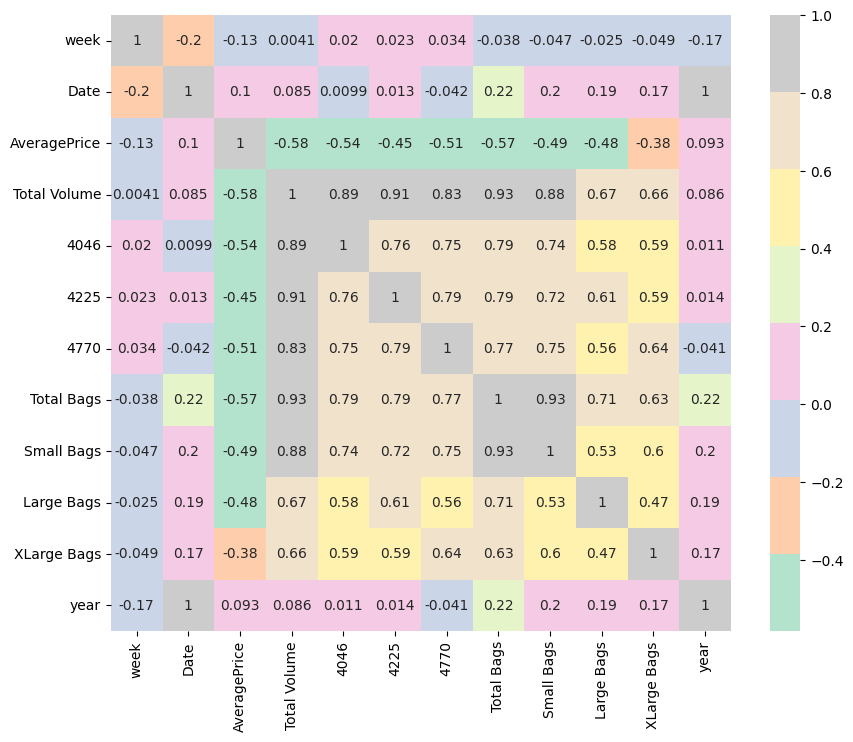

In [28]:
plt.figure(figsize=(10,8))
sns.heatmap(avocado.corr(),annot=True,cmap="Pastel2")
plt.show()

In [29]:
from sklearn.preprocessing import LabelEncoder

In [30]:
label_encoded= []
for col in ['type', 'region']:
    le = LabelEncoder()
    avocado[col] = le.fit_transform(avocado[col])
    label_encoded.append(col)
print(avocado.type.value_counts())
print(avocado.region.value_counts())

0    9126
1    9123
Name: type, dtype: int64
0     338
40    338
29    338
30    338
31    338
32    338
33    338
34    338
35    338
36    338
37    338
38    338
39    338
41    338
1     338
42    338
43    338
44    338
45    338
46    338
47    338
48    338
49    338
50    338
51    338
52    338
28    338
27    338
26    338
25    338
2     338
3     338
4     338
5     338
6     338
7     338
8     338
9     338
10    338
11    338
12    338
13    338
14    338
15    338
16    338
17    338
18    338
19    338
20    338
21    338
22    338
23    338
24    338
53    335
Name: region, dtype: int64


Training and testing the model for classification

In [31]:
X=avocado.iloc[:,:-1]
X

,week,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year
0,0,20151227,1.33,11.070344,6.944801,10.905146,3.895080,9.070833,9.060055,4.545951,0.0,0,2015
1,1,20151220,1.35,10.912867,6.515127,10.706381,4.083115,9.159737,9.149429,4.589955,0.0,0,2015
2,2,20151213,0.93,11.680313,6.679222,11.600485,4.879007,9.005325,8.992584,4.645736,0.0,0,2015
3,3,20151206,1.08,11.277116,7.032624,11.184108,4.298373,8.667708,8.644425,4.903495,0.0,0,2015
4,4,20151129,1.28,10.840377,6.848515,10.688288,4.340944,8.729874,8.697389,5.291746,0.0,0,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,20180204,1.63,9.745419,7.624599,7.333154,0.000000,9.510421,9.477908,6.070391,0.0,1,2018
18245,8,20180128,1.71,9.538855,7.083975,8.141044,0.000000,9.134090,9.098407,5.786284,0.0,1,2018
18246,9,20180121,1.87,9.530085,7.084159,7.805389,6.591591,9.147945,9.143431,3.768384,0.0,1,2018
18247,10,20180114,1.93,9.693150,7.332127,8.000363,6.590315,9.302969,9.298401,3.931826,0.0,1,2018


In [32]:
y=avocado.iloc[:,-1]
y

0         0
1         0
2         0
3         0
4         0
         ..
18244    53
18245    53
18246    53
18247    53
18248    53
Name: region, Length: 18249, dtype: int64

In [33]:
x_train,x_test,y_train,y_test =train_test_split(X,y, test_size=0.30, random_state=42)

In [34]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(12774, 13)
(5475, 13)
(12774,)
(5475,)


In [35]:
classification = [
    RandomForestClassifier(),
    QuadraticDiscriminantAnalysis(),
    DecisionTreeClassifier(),
    ExtraTreesClassifier(),
    AdaBoostClassifier(),
    LogisticRegression(),
    KNeighborsClassifier(),
]

In [36]:
head = 12
for model in classification[:head]:
    start = time()
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    train_time = time() - start
    start = time()
    predict_time = time()-start
    print(model)
    print("\tAccuracy Score:", accuracy_score(y_test, y_pred))
    print("\tConfusion Matrix:", confusion_matrix(y_test, y_pred))
    score = cross_val_score(model,x_train, y_train)
    print(score)
    print(score.mean())
    print("Difference btw accurancy and CV score is  ",accuracy_score(y_test, y_pred) - score.mean())
    #fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
    #roc_auc = metrics.auc(fpr, tpr)
    #display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name=model)
    #display.plot()
     #print("\tClassification Report:", classification_report(y_test, y_pred))
    print()

RandomForestClassifier()
	Accuracy Score: 0.914337899543379
	Confusion Matrix: [[94  0  0 ...  0  0  0]
 [ 0 89  0 ...  0  0  1]
 [ 0  0 94 ...  0  0  0]
 ...
 [ 0  0  0 ... 99  0  0]
 [ 0  0  0 ...  0 91  0]
 [ 0  0  1 ...  0  0 79]]
[0.90606654 0.90332681 0.91780822 0.91663405 0.90446359]
0.9096598405938575
Difference btw accurancy and CV score is   0.004678058949521446

QuadraticDiscriminantAnalysis()
	Accuracy Score: 0.810958904109589
	Confusion Matrix: [[86  0  0 ...  0  0  0]
 [ 0 64  0 ...  0  0  4]
 [ 0  0 90 ...  0  0  1]
 ...
 [ 0  0  0 ... 99  0  0]
 [ 0  0  0 ...  0 88  0]
 [ 0  0  0 ...  0  0 76]]
[0.81917808 0.81448141 0.8258317  0.82700587 0.82693814]
0.8226870401672217
Difference btw accurancy and CV score is   -0.011728136057632677

DecisionTreeClassifier()
	Accuracy Score: 0.7952511415525114
	Confusion Matrix: [[79  0  0 ...  0  0  0]
 [ 0 72  0 ...  0  1  3]
 [ 0  0 84 ...  0  0  3]
 ...
 [ 0  0  0 ... 99  0  0]
 [ 0  0  0 ...  0 88  0]
 [ 0  0  2 ...  0  0 62]]
[0.7

comparing training accuracy and CV score  ExtraTreesClassifier is the best model

*   working on hyperparameter training
*   ploting the graph
*   ValueError: multiclass format is not supported ( ROC -AUC could not be plotted due to multiclass format)






In [37]:
etc=ExtraTreesClassifier()
etc.fit(x_train,y_train)
predetc=etc.predict(x_test)
print(accuracy_score(y_test, predetc))
print(confusion_matrix(y_test, predetc))
#print(classification_report(y_test, predetc))

0.9227397260273973
[[95  0  0 ...  0  0  0]
 [ 0 93  0 ...  0  0  1]
 [ 0  0 95 ...  0  0  0]
 ...
 [ 0  0  0 ... 99  0  0]
 [ 0  0  0 ...  0 92  0]
 [ 0  0  0 ...  0  0 84]]


In [69]:
import joblib
joblib.dump(etc,'Avocado-region.pkl')

['Avocado-region.pkl']


---

---

# Using Pycaret for regression training and testing and hyperparameter tunning and end graphs have done all the necessary EDA and encoding before this stage while working on classification statement.

---
---



In [39]:
import pycaret
from pycaret.regression import *

In [40]:
avocado_df=setup(avocado,target="AveragePrice")

,Description,Value
0,Session id,6876
1,Target,AveragePrice
2,Target type,Regression
3,Original data shape,"(18249, 14)"
4,Transformed data shape,"(18249, 14)"
5,Transformed train set shape,"(12774, 14)"
6,Transformed test set shape,"(5475, 14)"
7,Numeric features,13
8,Preprocess,True
9,Imputation type,simple


In [41]:
best= compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,0.0807,0.0140,0.1184,0.9124,0.0474,0.0598,2.0380
xgboost,Extreme Gradient Boosting,0.0853,0.0140,0.1184,0.9123,0.0474,0.0625,0.2220
rf,Random Forest Regressor,0.0893,0.0167,0.1292,0.8954,0.0520,0.0663,5.0200
lightgbm,Light Gradient Boosting Machine,0.0992,0.0180,0.1342,0.8873,0.0541,0.0735,1.8700
gbr,Gradient Boosting Regressor,0.1452,0.0369,0.1920,0.7694,0.0771,0.1083,2.4020
dt,Decision Tree Regressor,0.1233,0.0372,0.1928,0.7667,0.0770,0.0903,0.0910
ada,AdaBoost Regressor,0.2088,0.0659,0.2567,0.5879,0.1075,0.1677,0.6480
knn,K Neighbors Regressor,0.1990,0.0682,0.2612,0.5733,0.1067,0.1518,0.0390
br,Bayesian Ridge,0.2061,0.0695,0.2635,0.5659,0.1080,0.1578,0.0310
lr,Linear Regression,0.2061,0.0695,0.2635,0.5659,0.1080,0.1578,0.6860


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

In [42]:
#crossvalidating
et=create_model('et')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0745,0.0116,0.1079,0.9230,0.0441,0.0556
1,0.0835,0.0157,0.1251,0.9129,0.0494,0.0615
2,0.0803,0.0148,0.1215,0.9064,0.0485,0.0597
3,0.0835,0.0139,0.1178,0.9173,0.0484,0.0634
4,0.0808,0.0133,0.1155,0.9134,0.0462,0.0589
5,0.0812,0.0154,0.1240,0.9024,0.0487,0.0600
6,0.0808,0.0141,0.1186,0.9137,0.0475,0.0602
7,0.0807,0.0136,0.1168,0.9075,0.0464,0.0588
8,0.0818,0.0149,0.1219,0.9068,0.0479,0.0597


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [43]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [66]:
pred_holdout=predict_model(best)


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,0.0802,0.0144,0.1201,0.9132,0.0470,0.0583




---



---



**on the basis of R2 and 10 CV attempts et	Extra Trees Regressor is best model here**

---



---



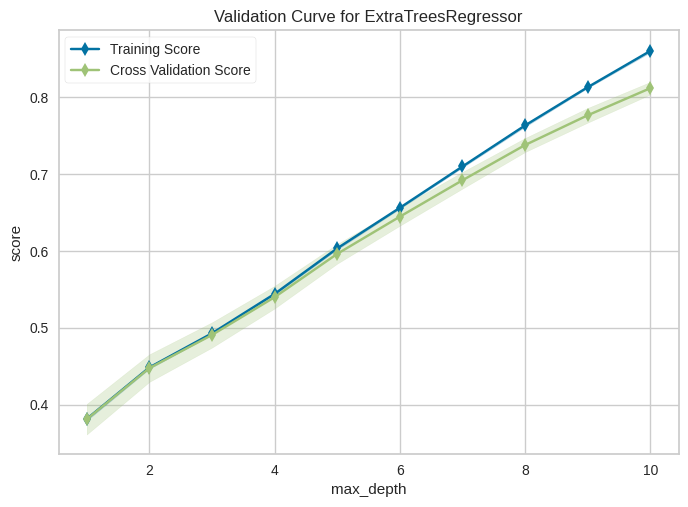

In [45]:
plot_model(et,plot='vc')

In [63]:
final_et = finalize_model(et)

In [67]:
import joblib
joblib.dump(final_et,'Avocado-price.pkl')

['Avocado-price.pkl']


---


---


# Reworked with regular steps incase pycaret is not allowed.

---

---



In [46]:
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor,RandomForestRegressor,ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [47]:
X=avocado.iloc[:,3:]
X

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,11.070344,6.944801,10.905146,3.895080,9.070833,9.060055,4.545951,0.0,0,2015,0
1,10.912867,6.515127,10.706381,4.083115,9.159737,9.149429,4.589955,0.0,0,2015,0
2,11.680313,6.679222,11.600485,4.879007,9.005325,8.992584,4.645736,0.0,0,2015,0
3,11.277116,7.032624,11.184108,4.298373,8.667708,8.644425,4.903495,0.0,0,2015,0
4,10.840377,6.848515,10.688288,4.340944,8.729874,8.697389,5.291746,0.0,0,2015,0
...,...,...,...,...,...,...,...,...,...,...,...
18244,9.745419,7.624599,7.333154,0.000000,9.510421,9.477908,6.070391,0.0,1,2018,53
18245,9.538855,7.083975,8.141044,0.000000,9.134090,9.098407,5.786284,0.0,1,2018,53
18246,9.530085,7.084159,7.805389,6.591591,9.147945,9.143431,3.768384,0.0,1,2018,53
18247,9.693150,7.332127,8.000363,6.590315,9.302969,9.298401,3.931826,0.0,1,2018,53


In [48]:
Y=avocado.iloc[:,2]
Y

0        1.33
1        1.35
2        0.93
3        1.08
4        1.28
         ... 
18244    1.63
18245    1.71
18246    1.87
18247    1.93
18248    1.62
Name: AveragePrice, Length: 18249, dtype: float64

In [49]:
train_x,test_x,train_y,test_y =train_test_split(X,Y, test_size=0.30, random_state=42)

In [50]:
print(train_x.shape)
print(test_y.shape)
print(train_x.shape)
print(test_y.shape)

(12774, 11)
(5475,)
(12774, 11)
(5475,)


In [51]:
model_regression = {
    "Linear Regression" : LinearRegression(),
        "Decision Tree" : DecisionTreeRegressor(),
        "Random Forest" : RandomForestRegressor(),
    "Gradient Boosting" :GradientBoostingRegressor(),
    "Ada Boost" :AdaBoostRegressor(),
    "Extra Trees" :ExtraTreesRegressor()
}

In [52]:
for i,model in model_regression.items():
    model.fit(train_x,train_y)
    print(f'{i} trained')

Linear Regression trained
Decision Tree trained
Random Forest trained
Gradient Boosting trained
Ada Boost trained
Extra Trees trained


In [53]:
for i, model in model_regression.items():
    print(f'{i} R^2 Score: {format(model.score(test_x, test_y), ".3f")}')

Linear Regression R^2 Score: 0.508
Decision Tree R^2 Score: 0.691
Random Forest R^2 Score: 0.843
Gradient Boosting R^2 Score: 0.674
Ada Boost R^2 Score: 0.444
Extra Trees R^2 Score: 0.869


In [54]:
for i, model in model_regression.items():
    y_pred = model.predict(test_x)
    mae = mean_absolute_error(test_y, y_pred)
    print(f'{i} MAE: {format(mae, ".3f")}')

Linear Regression MAE: 0.219
Decision Tree MAE: 0.144
Random Forest MAE: 0.112
Gradient Boosting MAE: 0.173
Ada Boost MAE: 0.245
Extra Trees MAE: 0.100


In [55]:
et = ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='squared_error')
et.fit(train_x, train_y)
pred_test_et = et.predict(test_x)
print("r2_score is = ",r2_score(test_y,pred_test_et)*100)
print('mean_absolute_error = ',mean_absolute_error(test_y,pred_test_et))
print('mean_squared_error = ',mean_squared_error(test_y,pred_test_et))
print('root_mean_squared_error = ',np.sqrt(mean_squared_error(test_y,pred_test_et)))

r2_score is =  87.1179337859241
mean_absolute_error =  0.09987846575342466
mean_squared_error =  0.020783700065753426
root_mean_squared_error =  0.14416553008869154


In [57]:
pred_et=r2_score(test_y,pred_test_et)
for i in range(2,8):
    score=cross_val_score(et,X,Y,cv=i)
    lsc=score.mean()
    print('At cv =',i)
    print('Cross validation score is =',lsc*100)
    print('Accuracy score is =',pred_et*100)
    print('\n')

At cv = 2
Cross validation score is = -120.45192779487115
Accuracy score is = 87.1179337859241


At cv = 3
Cross validation score is = 7.110862414353984
Accuracy score is = 87.1179337859241


At cv = 4
Cross validation score is = 10.63916563717591
Accuracy score is = 87.1179337859241


At cv = 5
Cross validation score is = 32.23340799041636
Accuracy score is = 87.1179337859241


At cv = 6
Cross validation score is = 22.455073631289306
Accuracy score is = 87.1179337859241


At cv = 7
Cross validation score is = 36.84117969569064
Accuracy score is = 87.1179337859241




Text(0.5, 1.0, 'Extra Trees Regression')

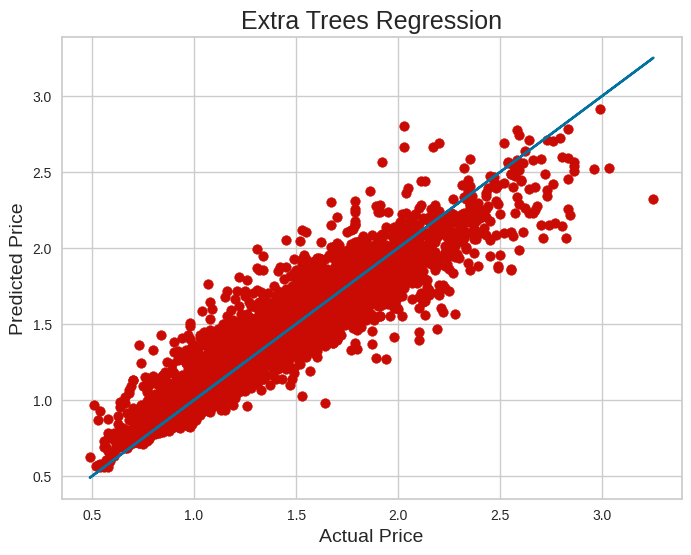

In [61]:
plt.figure(figsize=(8,6))
plt.scatter(x=test_y,y=pred_test_et,color='r')
plt.plot(test_y,test_y,color='b')
plt.xlabel('Actual Price',fontsize=14)
plt.ylabel('Predicted Price',fontsize=14)
plt.title('Extra Trees Regression',fontsize=18)

In [68]:
import joblib
joblib.dump(et,'Avocado-price1.pkl')

['Avocado-price1.pkl']